In [2]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [4]:
path = "/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/hov_muller_31_Reconstructed_Images_W_Comp_"
number = 80
all_interps = np.empty(shape=(80*15, 128))
for i in range(number):
    #interp = np.load(path+str(i+int(number/2))+'_'+str(i+1+int(number/2))+".npy")
    interp = np.load(path+str(i)+'_'+str(i+1)+".npy")
    interp = np.reshape(interp, (15,30,128))
    all_interps[15*i:15*(i+1),:] = np.squeeze(interp[:,-12,:])
    

In [5]:
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/synoptic_amazon_point.npy")

scaled_interp = np.interp(all_interps, (0, 1), (Min_Scalar, Max_Scalar))
scaled_test = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [5]:
print(scaled_test.shape)
print(scaled_interp.shape)

(960, 30, 128)
(1200, 128)


Text(0.5, 0.98, 'Hovmuller for Omega 500 interpolated motion at minute time scale')

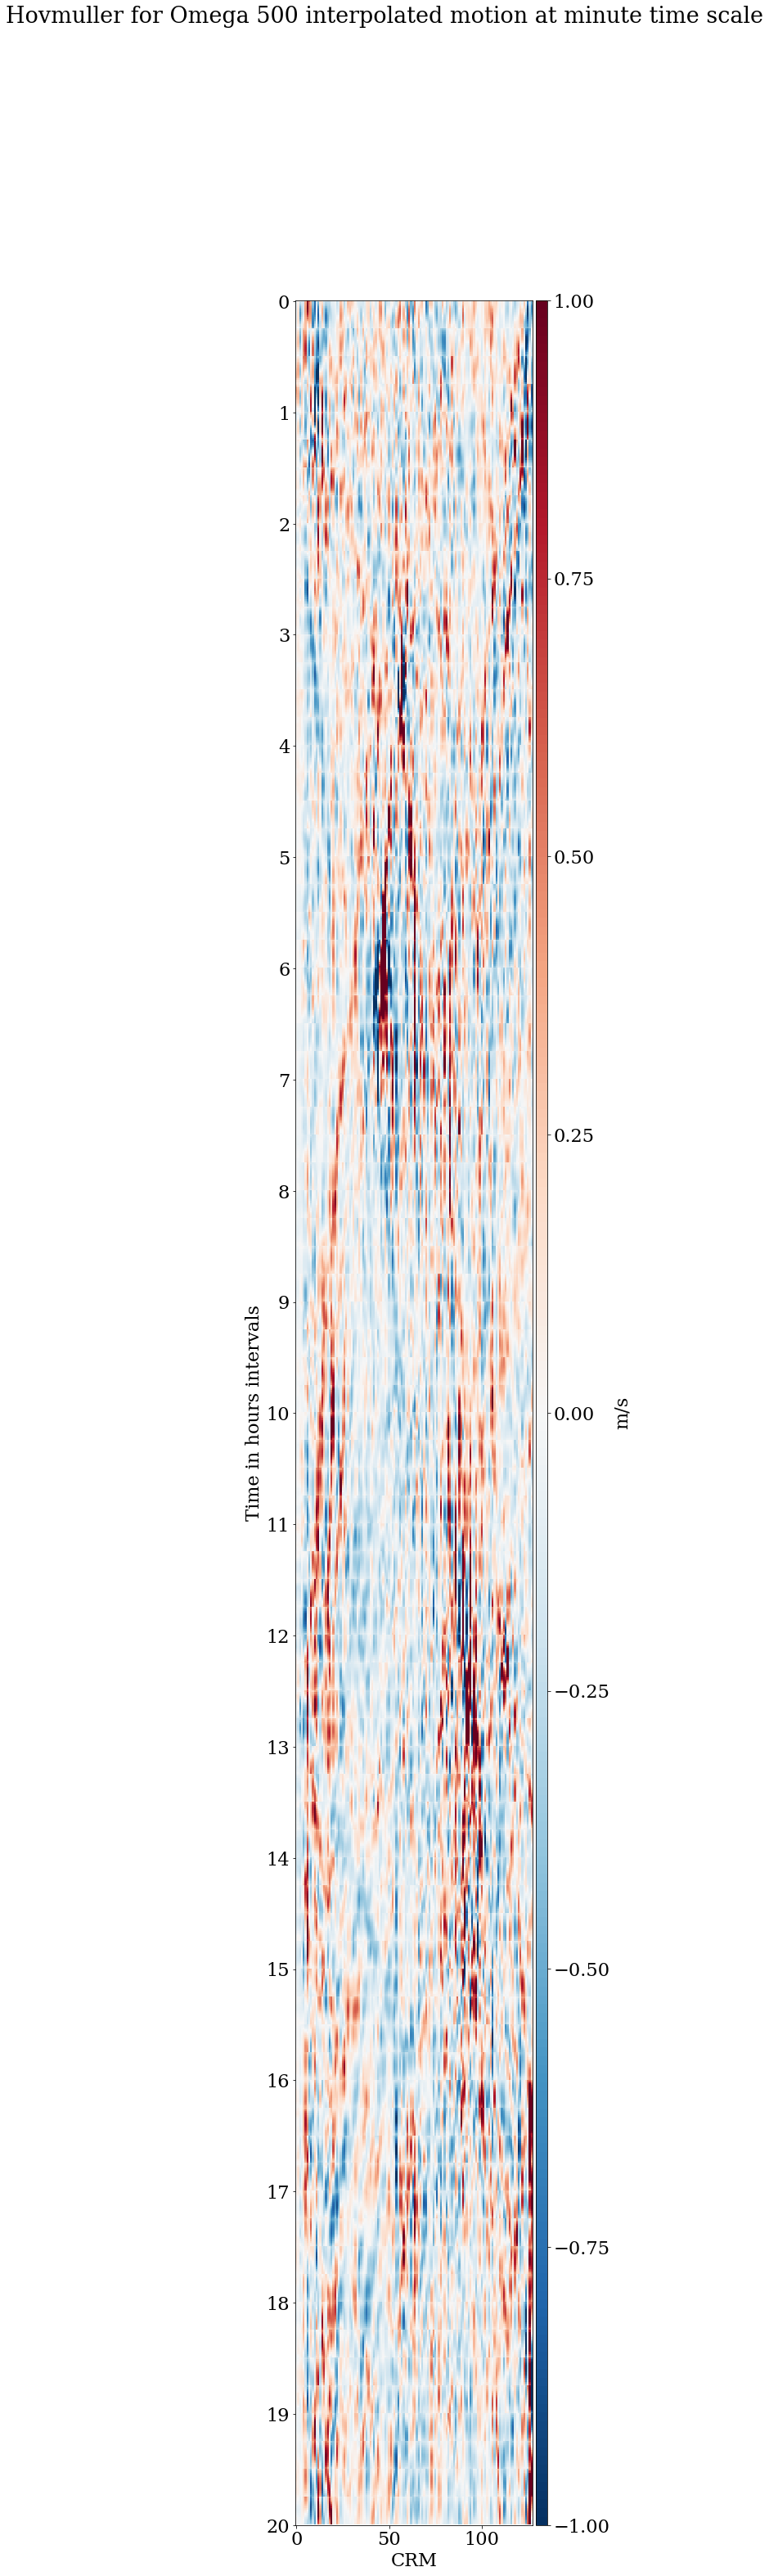

In [6]:
#fig, ax = plt.subplots(figsize=(50,50))
fig, ax = plt.subplots(figsize=(50,50))
cs3 = ax.imshow(scaled_interp, vmin=-1.0,vmax=1.0, cmap="RdBu_r")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cs3, cax=cax, label="m/s")
ax.set_xlabel("CRM")
ax.set_ylabel("Time in hours intervals")
y_ticks = np.arange(0,1260,60)
ax.set_yticks(y_ticks)
y_tick_labels = np.arange(0,21,1)
ax.set_yticklabels(y_tick_labels)
plt.suptitle("Hovmuller for Omega 500 interpolated motion at minute time scale")

Text(0.5, 0.9, 'Hovmuller for Omega 500 interpolated motion at minute time scale')

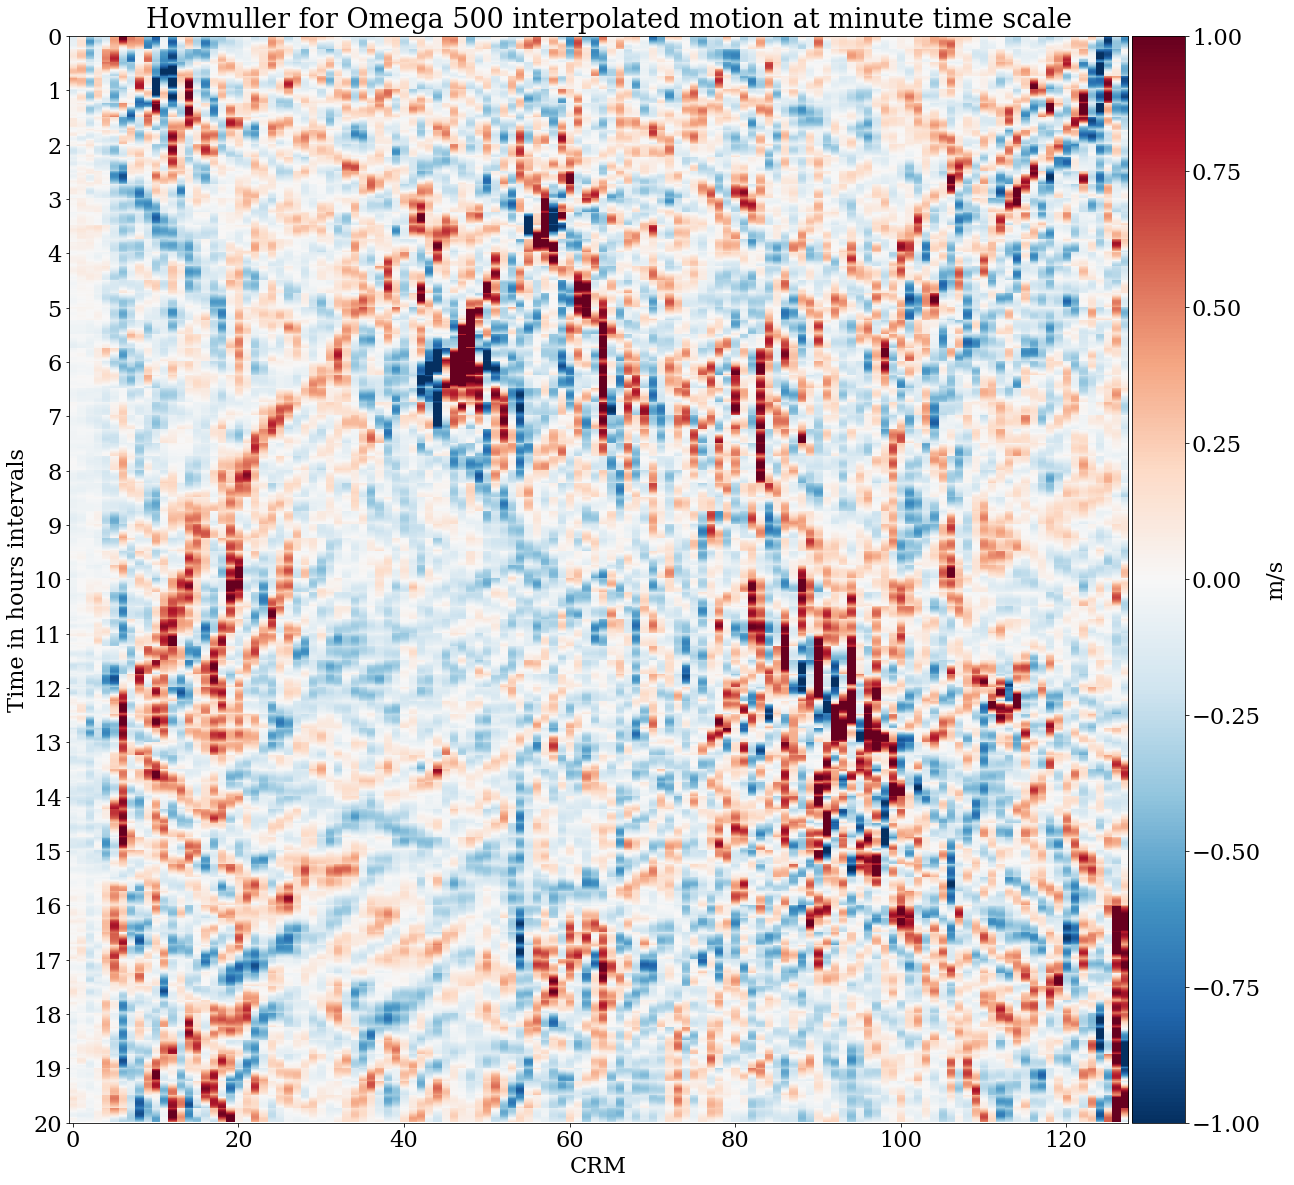

In [7]:
#fig, ax = plt.subplots(figsize=(50,50))
fig, ax = plt.subplots(figsize=(20,20))
cs3 = ax.imshow(scaled_interp, vmin=-1.0,vmax=1.0, cmap="RdBu_r", aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cs3, cax=cax, label="m/s")
ax.set_xlabel("CRM")
ax.set_ylabel("Time in hours intervals")
y_ticks = np.arange(0,1260,60)
ax.set_yticks(y_ticks)
y_tick_labels = np.arange(0,21,1)
ax.set_yticklabels(y_tick_labels)
plt.suptitle("Hovmuller for Omega 500 interpolated motion at minute time scale", y=0.90)

In [8]:
print(scaled_test[40:121,-12,:].shape)

(81, 128)


Text(0.5, 0.9, 'Hovmuller for Omega 500 actual motion at 15 minute time scale')

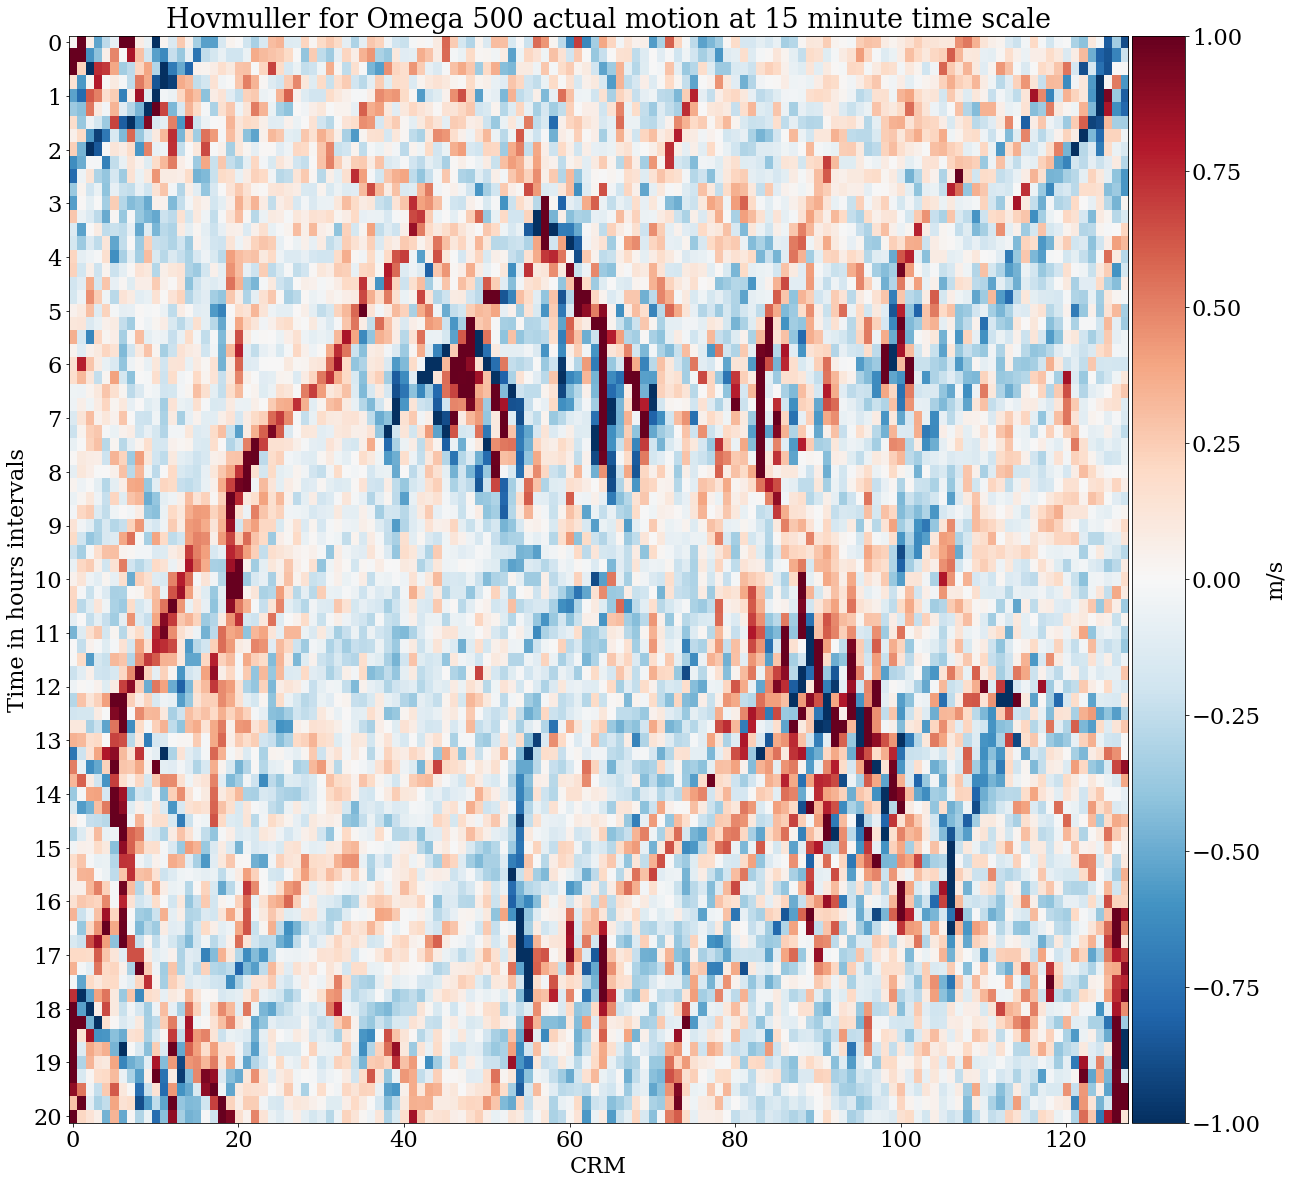

In [6]:
#fig, ax = plt.subplots(figsize=(50,50))
fig, ax = plt.subplots(figsize=(20,20))
cs3 = ax.imshow(scaled_test[:81,-12,:], vmin=-1.0,vmax=1.0, cmap="RdBu_r", aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cs3, cax=cax, label="m/s")
ax.set_xlabel("CRM")
ax.set_ylabel("Time in hours intervals")
y_ticks = np.arange(0,84,4)
ax.set_yticks(y_ticks)
y_tick_labels = np.arange(0,21,1)
ax.set_yticklabels(y_tick_labels)
plt.suptitle("Hovmuller for Omega 500 actual motion at 15 minute time scale", y=0.90)

## Shrunk Cells

In [10]:
scaled_interp.shape

(1200, 128)

Text(0.5, 0.9, 'Hovmuller for Omega 500 interpolated motion at minute time scale')

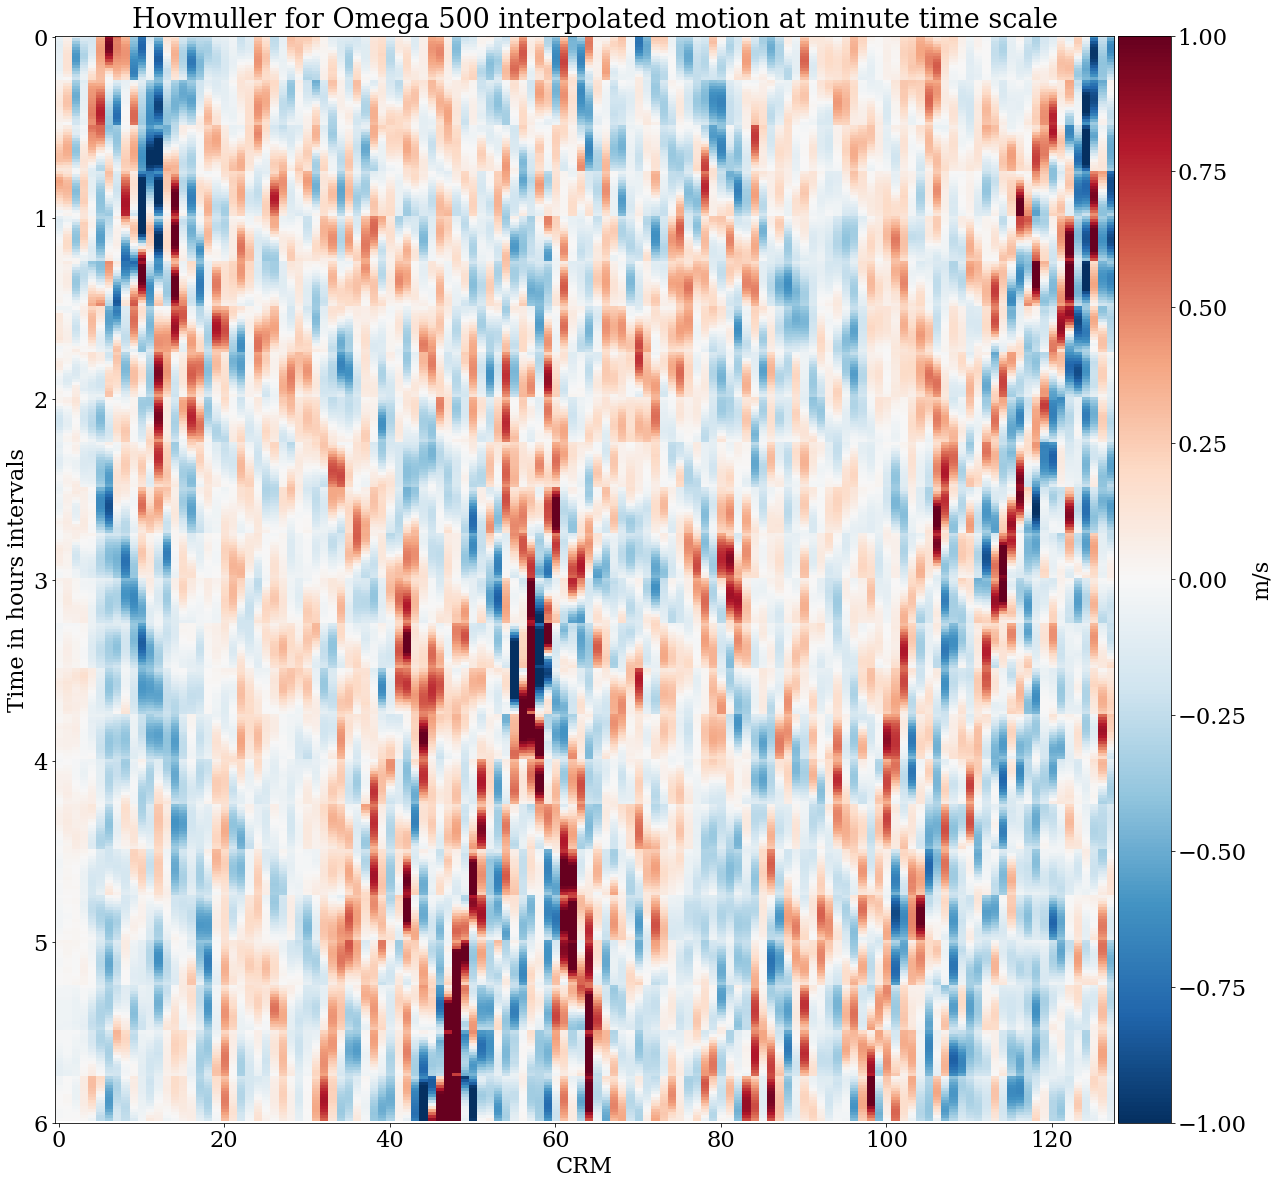

In [11]:
#fig, ax = plt.subplots(figsize=(50,50))
fig, ax = plt.subplots(figsize=(20,20))
cs3 = ax.imshow(scaled_interp[:360,:], vmin=-1.0,vmax=1.0, cmap="RdBu_r", aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cs3, cax=cax, label="m/s")
ax.set_xlabel("CRM")
ax.set_ylabel("Time in hours intervals")
y_ticks = np.arange(0,420,60)
ax.set_yticks(y_ticks)
y_tick_labels = np.arange(0,7,1)
ax.set_yticklabels(y_tick_labels)
plt.suptitle("Hovmuller for Omega 500 interpolated motion at minute time scale", y=0.90)

Text(0.5, 0.9, 'Hovmuller for Omega 500 actual motion at 15 minute time scale')

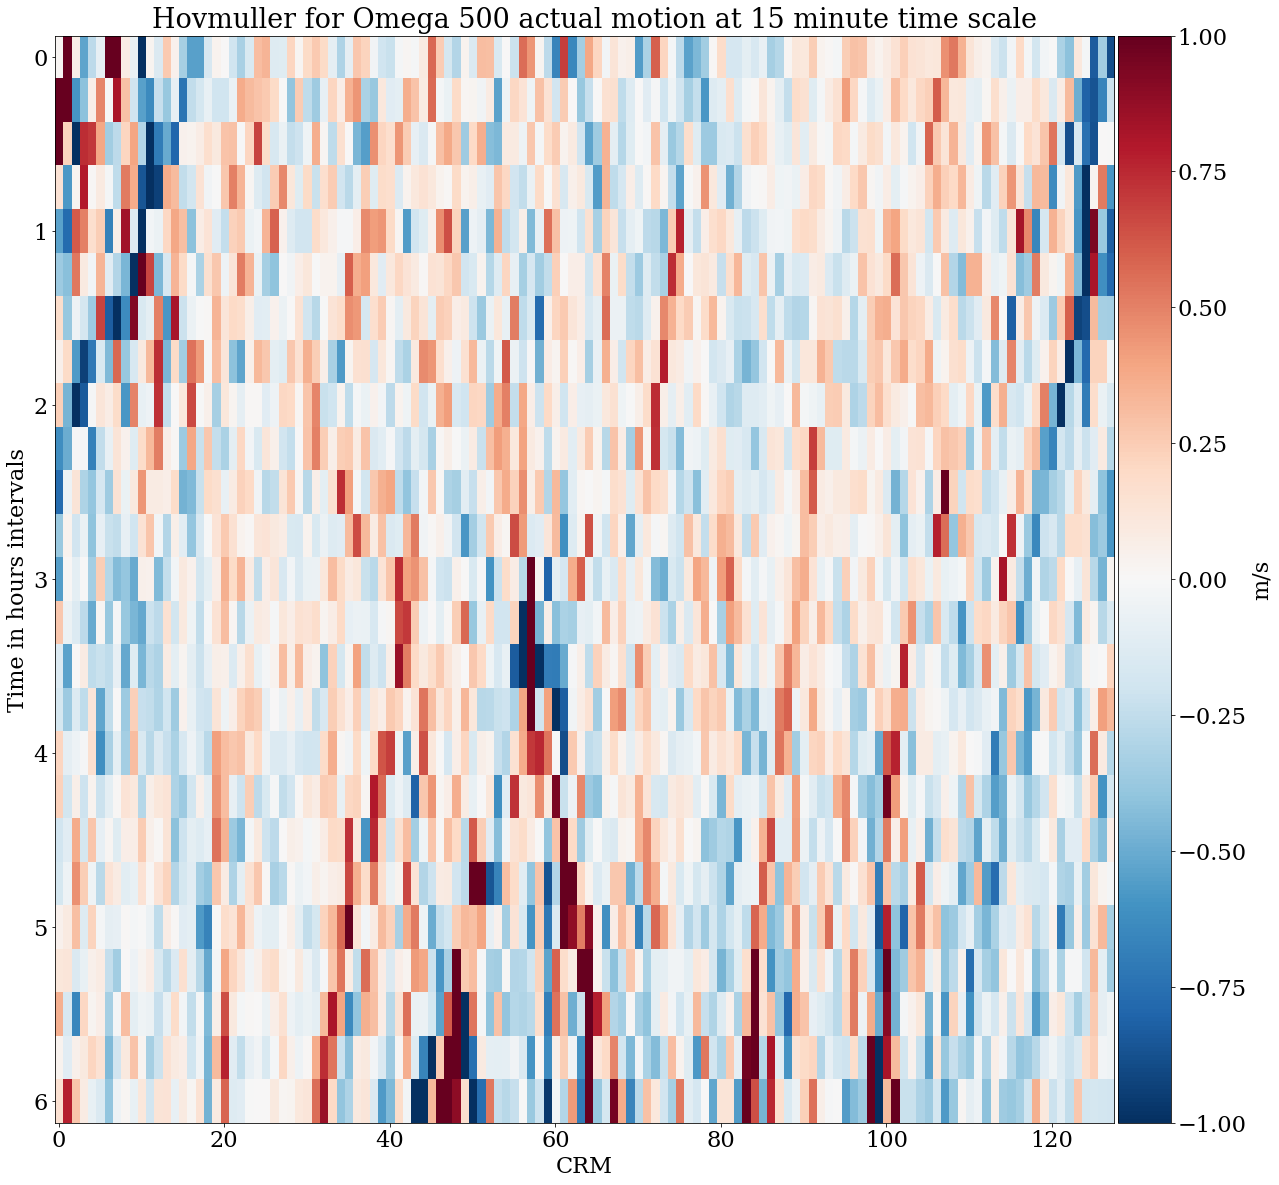

In [7]:
#fig, ax = plt.subplots(figsize=(50,50))
fig, ax = plt.subplots(figsize=(20,20))
cs3 = ax.imshow(scaled_test[:25,-12,:], vmin=-1.0,vmax=1.0, cmap="RdBu_r", aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cs3, cax=cax, label="m/s")
ax.set_xlabel("CRM")
ax.set_ylabel("Time in hours intervals")
y_ticks = np.arange(0,28,4)
ax.set_yticks(y_ticks)
y_tick_labels = np.arange(0,7,1)
ax.set_yticklabels(y_tick_labels)
plt.suptitle("Hovmuller for Omega 500 actual motion at 15 minute time scale", y=0.90)